In [3]:
pip install geopandas

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Shapely-1.7.1-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached pyproj-3.0.0.post1-cp38-cp38-win_amd64.whl (14.4 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Julián\\AppData\\Local\\Temp\\pip-install-9ywurj4g\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Julián\\AppData\\Local\\Temp\\pip-install-9ywurj4g\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Julián\AppData\Local\Temp\pip-pip-egg-info-nkncsnno'
         cwd: C:\Users\Julián\AppData\Local\Temp\pip-install-9ywurj4g\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from geopandas import geodataframe
#from shapely.geometry import Point



ImportError: cannot import name 'geodataframe' from 'geopandas' (unknown location)

## CARGAMOS LOS RADIOS CENSALES DE CABA

http://datos.minem.gob.ar/dataset/informacion-socioeconomica-indec-radios-censales/archivo/ea0027f5-0841-425e-8f5b-8211e2e75380


In [7]:
rc1 = gpd.read_file('ciudad-autnoma-de-buenos-aires-shp.shp')
#Revisamos la proyección
rc1.crs

AttributeError: module 'geopandas' has no attribute 'read_file'

In [3]:
#Vemos el contenido del df de radios censales
rc1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LINK        3554 non-null   object  
 1   DEPARTAMEN  3554 non-null   object  
 2   PROVINCIA   3554 non-null   object  
 3   HABTOT      3552 non-null   float64 
 4   VIVTOT      3552 non-null   float64 
 5   HOGTOT      3552 non-null   float64 
 6   PORCCONNBI  3554 non-null   float64 
 7   PORCAGUARE  3554 non-null   float64 
 8   PORCGASRED  3554 non-null   float64 
 9   PORCDESAGU  3554 non-null   float64 
 10  PORCCOMPUT  3554 non-null   float64 
 11  PORCCELULA  3554 non-null   float64 
 12  GEOJSON     3554 non-null   object  
 13  geometry    3554 non-null   geometry
dtypes: float64(9), geometry(1), object(4)
memory usage: 388.8+ KB


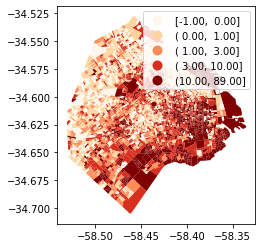

In [4]:
# Ploteamos el Df de radios censales para conocer como se distribuye el NBI en la CABA
# VER DOCU GEOPANDAS https://geopandas.org/mergingdata.html
base = rc1.plot(column = 'PORCCONNBI', legend = True, cmap='OrRd', scheme='quantiles')
base

In [5]:
#Cargamos la base de beneficiarios que trabajamos para proyctarla en geográficamente como el df de radios censales (EPSG 4326)
gdp2 = pd.read_csv('datageo.csv')

/home/julian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,13,14,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Con Geopandas Armamos el GeoDataframe 'gdf'. utilizamos lat y long para construir el atributo geográfico del dataframe 'Geometry'

from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gdp2.long, gdp2.lat)]
df = gdp2.drop(['long', 'lat'], axis=1)
crs = {'init': 'epsg:4326'} 
gdf = GeoDataFrame(gdp2,crs=crs, geometry=geometry)

/home/julian/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
#Dropeamos algunas columnas que ya no nos sirven
gdf = gdf.drop(['Dirección Normalizada (ArcGIS)','Geocodificación', 'lat', 'long','Unnamed: 0','Unnamed: 0.1', 'Localidad'], axis=1)

gdf

,Nº de cuenta Contrato,CodPostal,Q Módulos,Distrito AySA,Exp SAP,Zonal,Sup Cub Exp,Sup Scub Exp,Porc Ph,Cantidad de integrantes del hogar,Total de ingresos del hogar,Gastos en vivienda,Gastos en salud,Gastos en gas y electricidad,Gastos en servicios optativos,Información adicional,Importe Factura sin TS c/imp,Importe Factura con TS c/imp,calle_normal,geometry
0,236881,C1440EYY,617,FLORES,22012688,1.45,237.0,0.0,100.00,3 FAMILIAS,11766.8,1236,0.0,0,729.24,NaN,138.6,NaN,"SUAREZ, JOSE LEON 2725",POINT (-58.50622 -34.66814)
1,465478,C1407FCQ,405,DEVOTO,21900218,1.60,179.0,0.0,100.00,17,5500,727,NaN,3600,800,PATRICIA NORMA LARA: TBCALDO ALFREDO PEREIRA: ...,3554.8,1545.8,MURATURE 5309,POINT (-58.50523 -34.63245)
2,2650382,C1206AAO,1743,CABALLITO,22238085,2.00,433.0,0.0,100.00,13,13884,NaN,1000.0,1140,1800,NaN,4573.75,3253.17,BOEDO 188,POINT (-58.41729 -34.61366)
3,1862061,C1191AAD,115,CABALLITO,21402874,2.00,3773.0,0.0,2.80,12,18000,2390,5000.0,1000,200,NaN,NaN,NaN,"GOMEZ, VALENTIN 2904",POINT (-58.40718 -34.60544)
4,2660762,C1425ETB,208,CABALLITO,22237659,2.40,1494.0,0.0,11.85,12,9500,4457,NaN,305,210,DANIEL BERNARDO DOMB: OSTEOMELITIS EN RODILLA ...,1194.16,167.85,"QUIRNO COSTA, NORBERTO, DR. 1250",POINT (-58.40550 -34.59541)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104745,213479,C1428DGD,562,BELGRANO,22073789,2.20,154.0,22.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OLAZABAL 1203,POINT (-58.44615 -34.55290)
104746,851139,C1407EXD,66,DEVOTO,21904368,1.60,1753.0,66.0,2.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BELAUSTEGUI, LUIS, DR. 3406",POINT (-58.48384 -34.61991)
104747,2193148,C1232AAR,71,CENTRO,21394658,1.80,2446.0,0.0,2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAN JUAN AV. 2278,POINT (-58.39740 -34.62326)
104748,3563643,C1426CTR,104,BELGRANO,22339722,2.20,1532.0,0.0,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GOROSTIAGA 2354,POINT (-58.44242 -34.57050)


In [6]:
#Guardamos el GDF porque siempre puede fallar!
# gdf.to_file('gdf.json', driver='GeoJSON')

In [8]:
#Seteamos la proyección
gdf = gdf.to_crs("EPSG:4326")

In [78]:
#Separamos una muestra para mapear y ver si esta ok
gdftest= gdf.sample(50)

In [9]:
#Revisamos proyección de los geodataframes que vamos a joinear por las dudas, sino no no van a coincidir en el plano!
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
rc1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
#Usamos SPATIAL JOIN de geopandas para mergear las columnas de ambos dataframes donde coincidan geográficamente.
spatial_join = gpd.sjoin(gdf,rc1, how="inner", op='intersects')
#Vemos que encontró la totalidad de los puntos!
spatial_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 104750 entries, 0 to 102057
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Nº de cuenta Contrato              104750 non-null  int64   
 1   CodPostal                          104750 non-null  object  
 2   Q Módulos                          104750 non-null  int64   
 3   Distrito AySA                      104750 non-null  object  
 4   Exp SAP                            104750 non-null  int64   
 5   Zonal                              104750 non-null  float64 
 6   Sup Cub Exp                        104750 non-null  float64 
 7   Sup Scub Exp                       104750 non-null  float64 
 8   Porc Ph                            104750 non-null  float64 
 9   Cantidad de integrantes del hogar  104744 non-null  object  
 10  Total de ingresos del hogar        104508 non-null  object  
 11  Gastos en vivienda

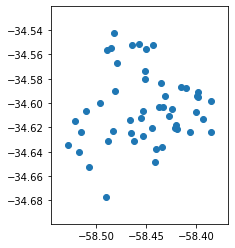

In [12]:
#Hacemos un test y ploteamos para ver si esta ok.
test_join = spatial_join.sample(50)

#Ploteaos el test 
fig, ax = plt.subplots()

ax.set_aspect('equal')

# rc1.plot(ax=ax, color='white', edgecolor='black')

test_join.plot(ax=ax)

plt.show();

In [52]:
#Cambiamos el nombre del df joineado
data = spatial_join

NameError: name 'spatial_join' is not defined

In [15]:
# Guardamos la base del join
# data.to_file("data.shp")
# data.to_file("data.geojson", driver='GeoJSON')

In [53]:
data = gpd.read_file('data.geojson')

## Modulos recibidos según el porcentaje de NBI de cada beneficiario.

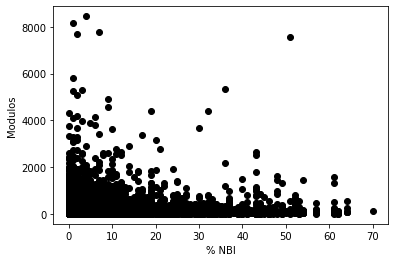

In [16]:
#Primera aproximación: ploteamos modulos sobre el porcentaje de NBI de cada beneficiario.

x = data.PORCCONNBI
y = data['Q Módulos']


plt.xlabel("% NBI")
plt.ylabel("Modulos");
plt.plot(x, y, 'o', color='black')
# plt.savefig('scater_NBI_modul.png')

## MODULOS POR NIVEL DE NBI

In [61]:
#Agrupamos modulos por nivel de nbi y ploteamos 
#para ver como la cantidad de modulos seǵun nbi de radio censal
nbi_modul = data.groupby('PORCCONNBI')

In [62]:
t = nbi_modul.sum()
t = t.reset_index()


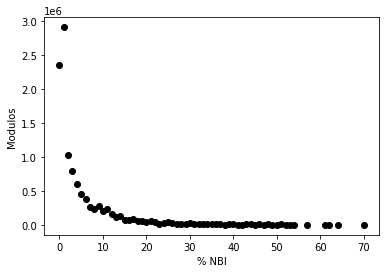

In [63]:
x = t.PORCCONNBI
y = t['Q Módulos']


plt.xlabel("% NBI")
plt.ylabel("Modulos");
plt.plot(x, y, 'o', color='black')
plt.savefig('scater_NBIgrouped_modul.png')

In [67]:
# Regresión polinomial!
# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

## MODULOS POR INGRESO DECLARADO DEL HOGAR

In [169]:
data['Total de ingresos del hogar'].describe()

count    1.047500e+05
mean     3.320829e+03
std      1.395160e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.810000e+03
max      3.831154e+07
Name: Total de ingresos del hogar, dtype: float64

In [179]:
data['Total de ingresos del hogar'].max()

38311540

In [ ]:
#Quitar outliers!

In [72]:
# data['Total de ingresos del hogar'] = data['Total de ingresos del hogar'].str.replace(',','.')
data['Total de ingresos del hogar'] = data['Total de ingresos del hogar'].fillna(0)
data['Total de ingresos del hogar'] = data['Total de ingresos del hogar'].astype(int)

x = data['Total de ingresos del hogar']
y = data['Q Módulos']

plt.figure()
plt.xlabel("Total de ingresos del hogar")
plt.ylabel('Q Módulos')
plt.plot(x, y, 'o', color='black')
# plt.savefig('scater_NBIgrouped_modul.png')

ValueError: invalid literal for int() with base 10: '11766.75'

## ZONAL / NBI 


## MODELO DE REGRESION

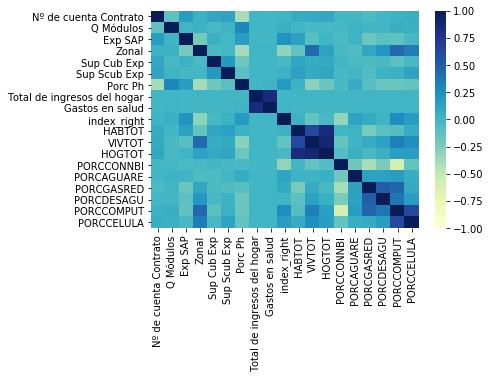

In [193]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

## MAPA MODULOS AGRUPADOS POR POLIGONO Y ARMAR UN MAPA GRADIENTE

In [247]:
# #Usamos SPATIAL JOIN de geopandas para mergear las columnas de ambos dataframes donde coincidan geográficamente.
# # spatial_join2 = gpd.sjoin(rc1,gdf,how="inner", op='intersects')
# #Vemos que encontró la totalidad de los puntos!
# # spatial_join2.crs
# spatial_join2.set_geometry('geometry')
# t = spatial_join2[['geometry','Q Módulos']]
# s = t.dissolve(by='geometry', aggfunc='sum')
# # data_poly= data_poly.reset_index() 

# CABA agrupando por comuna

In [11]:
pd.options.display.max_columns = None
comuna = data.groupby('DEPARTAMEN')

In [12]:
c=comuna.sum()

In [13]:
c1 = comuna.count()
c1 = c1.reset_index()

In [14]:
c= c.reset_index()

In [15]:
c

,DEPARTAMEN,Nº de cuenta Contrato,Q Módulos,Exp SAP,Zonal,Sup Cub Exp,Sup Scub Exp,Porc Ph,Gastos en salud,index_right,HABTOT,VIVTOT,HOGTOT,PORCCONNBI,PORCAGUARE,PORCGASRED,PORCDESAGU,PORCCOMPUT,PORCCELULA
0,Comuna 01,8325455219,704392,145593696675,16859.35,27464184.00,109769.80,44056.9554,6641878.62,1412056,4580101.0,3156617.0,1999053.0,92034.0,673567.0,637963.0,675809.0,441166.0,587620.0
1,Comuna 02,8687010509,611768,112429130698,14420.50,18614475.00,96225.00,22529.2550,8387407.42,2291612,4615825.0,3207361.0,2191349.0,10435.0,518846.0,507661.0,519469.0,411483.0,463135.0
2,Comuna 03,14559720883,835777,205460129381,19680.80,30886373.00,256926.00,76215.1954,9537196.26,6321484,7426121.0,4105705.0,3224550.0,99119.0,947853.0,915979.0,949213.0,616302.0,815739.0
3,Comuna 04,10194779385,546643,122532300718,8721.05,27451793.53,548736.24,195784.8396,4419195.45,5084640,5119469.0,2038021.0,1834341.0,56178.0,559008.0,501955.0,552414.0,335554.0,475158.0
4,Comuna 05,13181028377,693986,175509487747,16151.45,22470372.99,259734.00,115866.8777,29918315.85,9285776,7271017.0,3832056.0,3171099.0,45725.0,814767.0,795777.0,814457.0,573947.0,711330.0
5,Comuna 06,10486933699,583769,150174808114,13901.00,20881052.93,218630.00,91531.2494,7820879.93,9589646,6147821.0,3306829.0,2656929.0,14955.0,699628.0,689926.0,699094.0,524282.0,614365.0
6,Comuna 07,14227269047,788166,181770827857,14236.80,26220793.41,676045.00,237064.6039,8563108.08,13097756,7394664.0,3152078.0,2757489.0,44489.0,822649.0,793491.0,820386.0,547301.0,709945.0
7,Comuna 08,4847443731,357146,80372530153,4870.60,84176423.23,107425.11,170540.5451,2933077.43,6552060,3726366.0,1248591.0,1210632.0,19302.0,360409.0,319391.0,354548.0,194120.0,301070.0
8,Comuna 09,6272455098,691754,137525220382,9621.20,10567765.72,105915.85,345104.9350,5876456.02,12389785,5373500.0,2156160.0,1904447.0,22106.0,623610.0,599230.0,619143.0,384861.0,527553.0
9,Comuna 10,8542660324,935569,162839462128,11868.40,12522518.17,123725.92,357507.2880,7663294.30,16129442,6391931.0,2759200.0,2367457.0,23983.0,740894.0,726312.0,738349.0,497984.0,635235.0


In [16]:
c['usuarios'] = c1['Nº de cuenta Contrato']

In [17]:
c

,DEPARTAMEN,Nº de cuenta Contrato,Q Módulos,Exp SAP,Zonal,Sup Cub Exp,Sup Scub Exp,Porc Ph,Gastos en salud,index_right,HABTOT,VIVTOT,HOGTOT,PORCCONNBI,PORCAGUARE,PORCGASRED,PORCDESAGU,PORCCOMPUT,PORCCELULA,usuarios
0,Comuna 01,8325455219,704392,145593696675,16859.35,27464184.00,109769.80,44056.9554,6641878.62,1412056,4580101.0,3156617.0,1999053.0,92034.0,673567.0,637963.0,675809.0,441166.0,587620.0,6787
1,Comuna 02,8687010509,611768,112429130698,14420.50,18614475.00,96225.00,22529.2550,8387407.42,2291612,4615825.0,3207361.0,2191349.0,10435.0,518846.0,507661.0,519469.0,411483.0,463135.0,5199
2,Comuna 03,14559720883,835777,205460129381,19680.80,30886373.00,256926.00,76215.1954,9537196.26,6321484,7426121.0,4105705.0,3224550.0,99119.0,947853.0,915979.0,949213.0,616302.0,815739.0,9523
3,Comuna 04,10194779385,546643,122532300718,8721.05,27451793.53,548736.24,195784.8396,4419195.45,5084640,5119469.0,2038021.0,1834341.0,56178.0,559008.0,501955.0,552414.0,335554.0,475158.0,5606
4,Comuna 05,13181028377,693986,175509487747,16151.45,22470372.99,259734.00,115866.8777,29918315.85,9285776,7271017.0,3832056.0,3171099.0,45725.0,814767.0,795777.0,814457.0,573947.0,711330.0,8171
5,Comuna 06,10486933699,583769,150174808114,13901.00,20881052.93,218630.00,91531.2494,7820879.93,9589646,6147821.0,3306829.0,2656929.0,14955.0,699628.0,689926.0,699094.0,524282.0,614365.0,7006
6,Comuna 07,14227269047,788166,181770827857,14236.80,26220793.41,676045.00,237064.6039,8563108.08,13097756,7394664.0,3152078.0,2757489.0,44489.0,822649.0,793491.0,820386.0,547301.0,709945.0,8252
7,Comuna 08,4847443731,357146,80372530153,4870.60,84176423.23,107425.11,170540.5451,2933077.43,6552060,3726366.0,1248591.0,1210632.0,19302.0,360409.0,319391.0,354548.0,194120.0,301070.0,3628
8,Comuna 09,6272455098,691754,137525220382,9621.20,10567765.72,105915.85,345104.9350,5876456.02,12389785,5373500.0,2156160.0,1904447.0,22106.0,623610.0,599230.0,619143.0,384861.0,527553.0,6249
9,Comuna 10,8542660324,935569,162839462128,11868.40,12522518.17,123725.92,357507.2880,7663294.30,16129442,6391931.0,2759200.0,2367457.0,23983.0,740894.0,726312.0,738349.0,497984.0,635235.0,7417


In [18]:
c['ModulosXusiario'] = c['Q Módulos'] / c['usuarios']
c[['DEPARTAMEN','Q Módulos', 'usuarios','ModulosXusiario']].sort_values(by = 'ModulosXusiario')

,DEPARTAMEN,Q Módulos,usuarios,ModulosXusiario
5,Comuna 06,583769,7006,83.324151
4,Comuna 05,693986,8171,84.932811
2,Comuna 03,835777,9523,87.764045
6,Comuna 07,788166,8252,95.512118
3,Comuna 04,546643,5606,97.510346
7,Comuna 08,357146,3628,98.441566
0,Comuna 01,704392,6787,103.785472
14,Comuna 15,805504,7753,103.895782
8,Comuna 09,691754,6249,110.698352
13,Comuna 14,769704,6675,115.311461


In [19]:
nbixc = pd.read_csv('NBI-por-comuna.csv')

In [20]:
nbixc

,Comuna,Hogares con NBI
0,1,15.9
1,2,2.0
2,3,11.9
3,4,12.7
4,5,6.1
5,6,2.2
6,7,8.6
7,8,11.3
8,9,4.2
9,10,3.5


In [21]:
c['Hogares con NBI'] = nbixc['Hogares con NBI']

In [32]:
c['comuna'] = nbixc['Comuna']
c['comuna'] = c['comuna'].astype(int)
c.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DEPARTAMEN             15 non-null     object 
 1   Nº de cuenta Contrato  15 non-null     int64  
 2   Q Módulos              15 non-null     int64  
 3   Exp SAP                15 non-null     int64  
 4   Zonal                  15 non-null     float64
 5   Sup Cub Exp            15 non-null     float64
 6   Sup Scub Exp           15 non-null     float64
 7   Porc Ph                15 non-null     float64
 8   Gastos en salud        15 non-null     float64
 9   index_right            15 non-null     int64  
 10  HABTOT                 15 non-null     float64
 11  VIVTOT                 15 non-null     float64
 12  HOGTOT                 15 non-null     float64
 13  PORCCONNBI             15 non-null     float64
 14  PORCAGUARE             15 non-null     float64
 15  

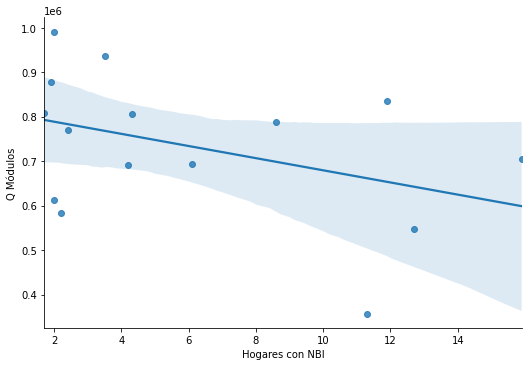

In [56]:
sns.lmplot(x='Hogares con NBI', y='Q Módulos', data=c, aspect=1.45, scatter_kws={'alpha':0.8});

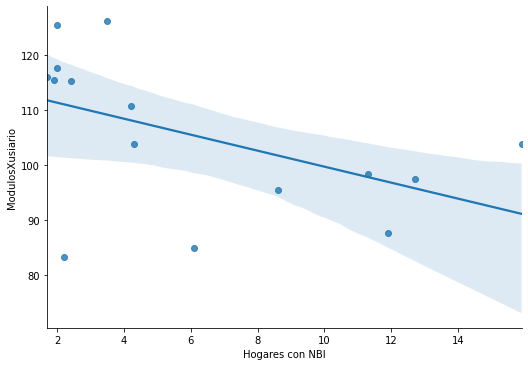

In [59]:
sns.lmplot(x='Hogares con NBI', y='ModulosXusiario', data=c, aspect=1.45, scatter_kws={'alpha':0.8});

In [38]:
c

,DEPARTAMEN,Nº de cuenta Contrato,Q Módulos,Exp SAP,Zonal,Sup Cub Exp,Sup Scub Exp,Porc Ph,Gastos en salud,index_right,HABTOT,VIVTOT,HOGTOT,PORCCONNBI,PORCAGUARE,PORCGASRED,PORCDESAGU,PORCCOMPUT,PORCCELULA,usuarios,ModulosXusiario,Hogares con NBI,comuna
0,Comuna 01,8325455219,704392,145593696675,16859.35,27464184.00,109769.80,44056.9554,6641878.62,1412056,4580101.0,3156617.0,1999053.0,92034.0,673567.0,637963.0,675809.0,441166.0,587620.0,6787,103.785472,15.9,1
1,Comuna 02,8687010509,611768,112429130698,14420.50,18614475.00,96225.00,22529.2550,8387407.42,2291612,4615825.0,3207361.0,2191349.0,10435.0,518846.0,507661.0,519469.0,411483.0,463135.0,5199,117.670321,2.0,2
2,Comuna 03,14559720883,835777,205460129381,19680.80,30886373.00,256926.00,76215.1954,9537196.26,6321484,7426121.0,4105705.0,3224550.0,99119.0,947853.0,915979.0,949213.0,616302.0,815739.0,9523,87.764045,11.9,3
3,Comuna 04,10194779385,546643,122532300718,8721.05,27451793.53,548736.24,195784.8396,4419195.45,5084640,5119469.0,2038021.0,1834341.0,56178.0,559008.0,501955.0,552414.0,335554.0,475158.0,5606,97.510346,12.7,4
4,Comuna 05,13181028377,693986,175509487747,16151.45,22470372.99,259734.00,115866.8777,29918315.85,9285776,7271017.0,3832056.0,3171099.0,45725.0,814767.0,795777.0,814457.0,573947.0,711330.0,8171,84.932811,6.1,5
5,Comuna 06,10486933699,583769,150174808114,13901.00,20881052.93,218630.00,91531.2494,7820879.93,9589646,6147821.0,3306829.0,2656929.0,14955.0,699628.0,689926.0,699094.0,524282.0,614365.0,7006,83.324151,2.2,6
6,Comuna 07,14227269047,788166,181770827857,14236.80,26220793.41,676045.00,237064.6039,8563108.08,13097756,7394664.0,3152078.0,2757489.0,44489.0,822649.0,793491.0,820386.0,547301.0,709945.0,8252,95.512118,8.6,7
7,Comuna 08,4847443731,357146,80372530153,4870.60,84176423.23,107425.11,170540.5451,2933077.43,6552060,3726366.0,1248591.0,1210632.0,19302.0,360409.0,319391.0,354548.0,194120.0,301070.0,3628,98.441566,11.3,8
8,Comuna 09,6272455098,691754,137525220382,9621.20,10567765.72,105915.85,345104.9350,5876456.02,12389785,5373500.0,2156160.0,1904447.0,22106.0,623610.0,599230.0,619143.0,384861.0,527553.0,6249,110.698352,4.2,9
9,Comuna 10,8542660324,935569,162839462128,11868.40,12522518.17,123725.92,357507.2880,7663294.30,16129442,6391931.0,2759200.0,2367457.0,23983.0,740894.0,726312.0,738349.0,497984.0,635235.0,7417,126.138466,3.5,10


In [45]:
# from sklearn.linear_model import LinearRegression

# y = d
# x = e

# # # Instanciamos el modelo y fiteamos

# linreg = LinearRegression()
# linreg.fit(x, y)

# # # Imprimimos coeficientes

# # print (linreg.intercept_)
# # print (linreg.coef_)

In [69]:
# import statsmodels.api as sm

# y=c['Q Módulos']
# X=c['Hogares con NBI']

# X = sm.add_constant(X)

# model = sm.OLS(y, X).fit()

# print (model.summary())

In [68]:
# import statsmodels.api as sm

# y=c['ModulosXusiario']
# X=c['Hogares con NBI']

# X = sm.add_constant(X)

# model = sm.OLS(y, X).fit()

# print (model.summary())

In [71]:
# https://www.youtube.com/watch?v=9FlUFLmaWvY&t=4660s


# from bokeh.plotting import figure, output_file, show
# from bokeh.tile_providers import CARTODBPOSITRON, get_provider

# output_file("tile.html")

# tile_provider = get_provider(CARTODBPOSITRON)

# # range bounds supplied in web mercator coordinates
# p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
#            x_axis_type="mercator", y_axis_type="mercator")
# p.add_tile(tile_provider)

# show(p)